In [56]:
#Import required libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
#import joblib

In [57]:
#Importing dataset csv file
df = pd.read_csv('salary.csv')
df.shape #print rows and coulumns of dataset

(5000, 11)

In [58]:
#Perform EDA(Exploratory Data Analysis) on salary dataset
df.head(10) #print first 10 rows of dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M
5,2024,MI,FT,Research Engineer,26000,EUR,28888,PT,0,PT,M
6,2023,EX,FT,Machine Learning Engineer,145000,USD,145000,US,100,US,M
7,2022,SE,FT,Data Scientist,130000,USD,130000,US,100,US,M
8,2023,SE,FT,Data Scientist,159832,USD,159832,US,0,US,M
9,2024,SE,FT,Data Engineer,160000,USD,160000,US,0,US,M


In [59]:
df.info() #print dataset info - coulumns, null-count, data-types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [60]:
#Converting some short-form into full-form for better understanding of dataset
employment_map = {
    'FT': 'Full-Time',
    'PT': 'Part-Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

experience_map = {
    'EN': 'Entry-Level',
    'MI': 'Mid-Level',
    'SE': 'Senior-Level',
    'EX': 'Executive-Level'
}

company_size_map = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}
df['employment_type']= df['employment_type'].map(employment_map)
df['experience_level'] = df['experience_level'].map(experience_map)
df['company_size'] = df['company_size'].map(company_size_map)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Mid-Level,Full-Time,Data Analyst,165000,USD,165000,AU,0,AU,Medium
1,2023,Mid-Level,Full-Time,Data Analyst,70000,USD,70000,US,100,US,Medium
2,2024,Mid-Level,Full-Time,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,Medium
3,2024,Senior-Level,Full-Time,Data Scientist,92700,USD,92700,US,0,US,Medium
4,2023,Mid-Level,Full-Time,Research Engineer,150000,USD,150000,US,0,US,Medium


In [61]:
#Droping unnecessary columns from datasets
df = df.drop(['work_year', 'salary','salary_currency','remote_ratio', 'employee_residence'], axis=1)
df.head()

,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,Mid-Level,Full-Time,Data Analyst,165000,AU,Medium
1,Mid-Level,Full-Time,Data Analyst,70000,US,Medium
2,Mid-Level,Full-Time,Machine Learning Engineer,94444,IE,Medium
3,Senior-Level,Full-Time,Data Scientist,92700,US,Medium
4,Mid-Level,Full-Time,Research Engineer,150000,US,Medium


In [62]:
#Saving cleaned dataset into new csv file
df.to_csv('cleaned_salary_data.csv', index=False)

In [63]:
#Label encoding string values to integers of dataset
le = LabelEncoder()
df['experience_level'] = le.fit_transform(df['experience_level'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['job_title'] = le.fit_transform(df['job_title'])
df['company_location'] = le.fit_transform(df['company_location'])
df['company_size'] = le.fit_transform(df['company_size'])

In [64]:
#Define x and y to to train model
x = df.drop(['salary_in_usd'], axis=1)
y = df['salary_in_usd']

#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

--- LinearRegression ---
Mean Absolute Error (MAE): 46387.64
Root Mean Squared Error (RMSE): 64102.63
R-squared (R2): 0.1743

--- RandomForest ---
Mean Absolute Error (MAE): 40792.61
Root Mean Squared Error (RMSE): 58242.17
R-squared (R2): 0.3184

--- GradientBoosting ---
Mean Absolute Error (MAE): 40684.08
Root Mean Squared Error (RMSE): 57822.89
R-squared (R2): 0.3281

--- DecisionTree ---
Mean Absolute Error (MAE): 41310.01
Root Mean Squared Error (RMSE): 59047.50
R-squared (R2): 0.2994

--- SVR ---
Mean Absolute Error (MAE): 52624.66
Root Mean Squared Error (RMSE): 71090.08
R-squared (R2): -0.0155


✅ Best model: GradientBoosting with MAE 40684.08
✅ Saved best model pipeline as best_model_pipeline.pkl


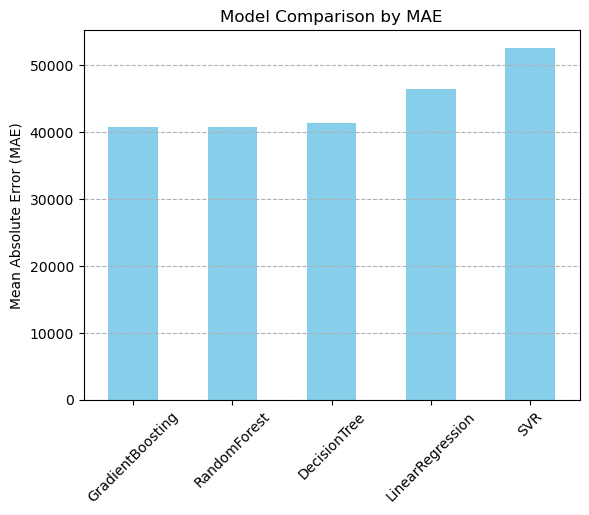

In [65]:
#Train diffrenet model of machine learning
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}
trained_pipelines = {}
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)    
    #Store results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    trained_pipelines[name] = pipe
    
    #Print results for each model
    print(f"--- {name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.4f}\n")

   
   
    best_model_name = min(results, key=lambda x: results[x]['MAE'])
    best_model_mae = results[best_model_name]['MAE']
    best_model = models[best_model_name]

print(f"\n✅ Best model: {best_model_name} with MAE {best_model_mae:.2f}")

#Save the best model pipeline
joblib.dump(best_model, "best_pipeline.pkl")
print("✅ Saved best model pipeline as best_model_pipeline.pkl")

#Visualize the results
results_df = pd.DataFrame(results).T
results_df['MAE'].sort_values().plot(kind='bar', color='skyblue')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison by MAE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()